In [2]:
pip install --upgrade pip setuptools wheel

In [3]:
pip install numpy --prefer-binary

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install nba_api

  Using cached nba_api-1.7.0-py3-none-any.whl.metadata (5.5 kB)
  Using cached numpy-1.26.4.tar.gz (15.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [21 lines of output]
      + c:\Users\mathe\AppData\Local\Programs\Python\Python313\python.exe C:\Users\mathe\AppData\Local\Temp\pip-install-jcvggt_l\numpy_76d6df94daae48388919a66a76901b47\vendored-meson\meson\meson.py setup C:\Users\mathe\AppData\Local\Temp\pip-install-jcvggt_l\numpy_76d6df94daae48388919a66a76901b47 C:\Users\mathe\AppData\Local\Temp\pip-install-jcvggt_l\numpy_76d6df94daae48388919a66a76901b47\.mesonpy-7gbqgjj3 -Dbuildtype=release -Db_ndebug=if-release -Db_vscrt=md --native-file=C:\Users\mathe\AppData\Local\Temp\pip-install-jcvggt_l\numpy_76d6df94daae48388919a66a76901b47\.mesonpy-7gbqgjj3\meson-python-native-file.ini
      The Meson build system
      Version: 1.2.99
      Source dir: C:\Users\mathe\AppData\Local\Temp\pip-install-jcvggt_l\numpy_76d6df94daae48388919a66a76901b47
      Build dir: C:\Users\mathe\AppData\Local\Temp\pip-install-jcv

In [28]:
%pip install nba_api

Note: you may need to restart the kernel to use updated packages.


In [29]:
from nba_api.stats.static import teams
from nba_api.stats.endpoints import CommonTeamRoster

# Buscar todos os times da NBA
all_teams = teams.get_teams()

# Encontrar o ID do Charlotte Hornets
hornets = next(team for team in all_teams if team['full_name'] == 'Charlotte Hornets')
team_id = hornets['id']

# Buscar elenco do time na temporada atual
roster = CommonTeamRoster(team_id=team_id).get_data_frames()[0]

# Exibir os jogadores do Hornets
roster[['PLAYER', 'POSITION', 'HEIGHT', 'WEIGHT', 'AGE', 'EXP']]


,PLAYER,POSITION,HEIGHT,WEIGHT,AGE,EXP
0,Miles Bridges,F,6-7,225,26.0,5
1,LaMelo Ball,G,6-7,180,23.0,4
2,Grant Williams,F,6-6,236,26.0,5
3,DaQuan Jeffries,G-F,6-5,222,27.0,5
4,Mark Williams,C,7-0,240,23.0,2
5,Nick Smith Jr.,G,6-2,185,20.0,1
6,Josh Green,G,6-5,200,24.0,4
7,Cody Martin,F,6-6,205,29.0,5
8,Josh Okogie,G,6-4,213,26.0,6
9,Moussa Diabate,F,6-9,210,23.0,2


In [3]:
# Filtrar apenas os jogadores desejados
jogadores_desejados = ['LaMelo Ball', 'Moussa Diabate', 'Brandon Miller']
roster_filtrado = roster[roster['PLAYER'].isin(jogadores_desejados)]

# Exibir a tabela apenas com os jogadores selecionados
roster_filtrado[['PLAYER', 'POSITION', 'HEIGHT', 'WEIGHT', 'AGE', 'EXP']]


,PLAYER,POSITION,HEIGHT,WEIGHT,AGE,EXP
1,LaMelo Ball,G,6-7,180,23.0,4
9,Moussa Diabate,F,6-9,210,23.0,2
13,Brandon Miller,F,6-7,200,22.0,1


In [4]:
# Filtrar apenas os jogadores desejados
jogadores_desejados = ['LaMelo Ball', 'Moussa Diabate', 'Brandon Miller']
roster_filtrado = roster[roster['PLAYER'].isin(jogadores_desejados)]

# Exibir todos os dados desses jogadores
roster_filtrado


,TeamID,SEASON,LeagueID,PLAYER,NICKNAME,PLAYER_SLUG,NUM,POSITION,HEIGHT,WEIGHT,BIRTH_DATE,AGE,EXP,SCHOOL,PLAYER_ID,HOW_ACQUIRED
1,1610612766,2024,00,LaMelo Ball,LaMelo,lamelo-ball,1,G,6-7,180,"AUG 22, 2001",23.0,4,Illawarra,1630163,#3 Pick in 2020 Draft
9,1610612766,2024,00,Moussa Diabate,Moussa,moussa-diabate,14,F,6-9,210,"JAN 21, 2002",23.0,2,Michigan,1631217,Signed on 07/31/24
13,1610612766,2024,00,Brandon Miller,Brandon,brandon-miller,24,F,6-7,200,"NOV 22, 2002",22.0,1,Alabama,1641706,#2 Pick in 2023 Draft


In [5]:
from nba_api.stats.endpoints import PlayerGameLog
from nba_api.stats.static import players
import pandas as pd

# Lista dos jogadores de interesse
player_names = ["LaMelo Ball", "Moussa Diabate", "Brandon Miller"]

# Obter os IDs dos jogadores
all_players = players.get_players()
player_ids = {p["full_name"]: p["id"] for p in all_players if p["full_name"] in player_names}

# Coletar estatísticas dos jogos da temporada atual
def get_player_game_logs(player_id):
    game_log = PlayerGameLog(player_id=player_id, season='2023-24').get_data_frames()[0]
    return game_log

# Criar DataFrame consolidado
game_logs = []
for name, player_id in player_ids.items():
    log_df = get_player_game_logs(player_id)
    log_df["Player"] = name  # Adicionar nome do jogador no DataFrame
    game_logs.append(log_df)

# Concatenar todos os dados em um único DataFrame
full_game_log = pd.concat(game_logs, ignore_index=True)

# Selecionar colunas necessárias
full_game_log = full_game_log[[
    "Player", "GAME_DATE", "MATCHUP", "WL", "PTS", "REB", "AST", "FG3A", "FG3M", "MIN"
]]

# Renomear colunas para facilitar a leitura
full_game_log.columns = [
    "Jogador", "Data do Jogo", "Adversário", "V/D", "Pontos", "Rebotes", "Assistências", 
    "Tentativas de 3PT", "Cestas de 3PT", "Minutos em Quadra"
]

# Exibir o DataFrame
full_game_log.head()

,Jogador,Data do Jogo,Adversário,V/D,Pontos,Rebotes,Assistências,Tentativas de 3PT,Cestas de 3PT,Minutos em Quadra
0,LaMelo Ball,"JAN 26, 2024",CHA vs. HOU,L,15,2,8,9,2,23
1,LaMelo Ball,"JAN 24, 2024",CHA @ DET,L,17,4,7,8,1,32
2,LaMelo Ball,"JAN 22, 2024",CHA @ MIN,W,18,6,13,6,1,35
3,LaMelo Ball,"JAN 19, 2024",CHA vs. SAS,W,28,1,8,6,4,32
4,LaMelo Ball,"JAN 17, 2024",CHA @ NOP,L,29,5,7,12,4,31


In [6]:
from nba_api.stats.endpoints import PlayerGameLog
from nba_api.stats.static import players

# Lista de jogadores a serem verificados
target_players = ["LaMelo Ball", "Moussa Diabate", "Brandon Miller"]

# Obter IDs dos jogadores
all_players = players.get_players()
player_ids = {p['full_name']: p['id'] for p in all_players if p['full_name'] in target_players}

# Verificar os logs de jogos para cada jogador
for name, player_id in player_ids.items():
    print(f"Verificando jogos de {name} (ID: {player_id})")
    
    # Buscar logs da temporada atual
    player_game_log = PlayerGameLog(player_id=player_id, season='2023-24')
    df = player_game_log.get_data_frames()[0]

    # Exibir as primeiras linhas ou mensagem caso não haja dados
    if df.empty:
        print(f"Nenhum jogo encontrado para {name}\n")
    else:
        print(df.head(), "\n")


Verificando jogos de LaMelo Ball (ID: 1630163)
  SEASON_ID  Player_ID     Game_ID     GAME_DATE      MATCHUP WL  MIN  FGM  \
0     22023    1630163  0022300635  JAN 26, 2024  CHA vs. HOU  L   23    6   
1     22023    1630163  0022300619  JAN 24, 2024    CHA @ DET  L   32    6   
2     22023    1630163  0022300610  JAN 22, 2024    CHA @ MIN  W   35    7   
3     22023    1630163  0022300584  JAN 19, 2024  CHA vs. SAS  W   32   10   
4     22023    1630163  0022300575  JAN 17, 2024    CHA @ NOP  L   31    8   

   FGA  FG_PCT  ...  DREB  REB  AST  STL  BLK  TOV  PF  PTS  PLUS_MINUS  \
0   16   0.375  ...     2    2    8    2    0    3   4   15         -25   
1   21   0.286  ...     3    4    7    1    0    4   6   17         -24   
2   18   0.389  ...     4    6   13    3    0    1   1   18          10   
3   13   0.769  ...     0    1    8    3    0    4   4   28          13   
4   19   0.421  ...     5    5    7    2    0    4   5   29         -12   

   VIDEO_AVAILABLE  
0           

In [7]:
from nba_api.stats.endpoints import CommonTeamRoster

# Buscar elenco do Charlotte Hornets
team_id = 1610612766  # ID do Charlotte Hornets
roster = CommonTeamRoster(team_id=team_id).get_data_frames()[0]

# Exibir o nome e ID de todos os jogadores do Hornets
roster[['PLAYER', 'PLAYER_ID']]


,PLAYER,PLAYER_ID
0,Miles Bridges,1628970
1,LaMelo Ball,1630163
2,Grant Williams,1629684
3,DaQuan Jeffries,1629610
4,Mark Williams,1631109
5,Nick Smith Jr.,1641733
6,Josh Green,1630182
7,Cody Martin,1628998
8,Josh Okogie,1629006
9,Moussa Diabate,1631217


In [11]:
# Obter os dados dos três jogadores
players_data = {}
for player, player_id in players_ids.items():
    players_data[player] = get_player_game_data(player_id)

# Exibir todos os dados de cada jogador
for player, data in players_data.items():
    print(f"Dados de jogos de {player}:")
    print(data, "\n")


Dados de jogos de LaMelo Ball:
   SEASON_ID  Player_ID     Game_ID     GAME_DATE      MATCHUP WL  MIN  FGM  \
0      22023    1630169  0022301188  APR 14, 2024  IND vs. ATL  W   25    5   
1      22023    1630169  0022301174  APR 12, 2024    IND @ CLE  L   35    7   
2      22023    1630169  0022301146  APR 09, 2024    IND @ TOR  W   31   10   
3      22023    1630169  0022301133  APR 07, 2024  IND vs. MIA  W   33    3   
4      22023    1630169  0022301116  APR 05, 2024  IND vs. OKC  W   36    3   
..       ...        ...         ...           ...          ... ..  ...  ...   
64     22023    1630169  0022300133  NOV 04, 2023  IND vs. CHA  L   37   14   
65     22023    1630169  0022300001  NOV 03, 2023  IND vs. CLE  W   34    5   
66     22023    1630169  0022300102  OCT 30, 2023  IND vs. CHI  L   36    6   
67     22023    1630169  0022300091  OCT 28, 2023    IND @ CLE  W   32    7   
68     22023    1630169  0022300064  OCT 25, 2023  IND vs. WAS  W   27    9   

    FGA  FG_PCT  ...

In [12]:
from nba_api.stats.endpoints import PlayerGameLog
import pandas as pd

# IDs corretos dos jogadores do Charlotte Hornets
hornets_players_ids = [
    1628970,  # Miles Bridges
    1630163,  # LaMelo Ball
    1629684,  # Grant Williams
    1629610,  # DaQuan Jeffries
    1631109,  # Mark Williams
    1641733,  # Nick Smith Jr.
    1630182,  # Josh Green
    1628998,  # Cody Martin
    1629006,  # Josh Okogie
    1631217,  # Moussa Diabate
    1631209,  # Isaiah Wong
    203995,   # Vasilije Micić
    1630544,  # Tre Mann
    1641706,  # Brandon Miller
    1642354,  # KJ Simpson
    203552,   # Seth Curry
    1642275,  # Tidjane Salaün
    201959    # Taj Gibson
]

# Função para obter os dados de jogos de um jogador
def get_player_game_data(player_id, season='2023-24'):
    player_games = PlayerGameLog(player_id=player_id, season=season).get_data_frames()[0]
    return player_games

# Obter os dados de todos os jogadores
hornets_players_data = {}
for player_id in hornets_players_ids:
    hornets_players_data[player_id] = get_player_game_data(player_id)

# Criar um DataFrame final combinando os dados de todos os jogadores
all_hornets_players_data = pd.concat(hornets_players_data.values(), keys=hornets_players_data.keys())

# Salvar os dados em um arquivo CSV
all_hornets_players_data.to_csv('jogos_charlotte_hornets.csv', index=False)

print("Dados salvos em 'jogos_charlotte_hornets.csv'")


Dados salvos em 'jogos_charlotte_hornets.csv'


C:\Users\mathe\AppData\Local\Temp\ipykernel_4968\1458173079.py:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_hornets_players_data = pd.concat(hornets_players_data.values(), keys=hornets_players_data.keys())


In [1]:
import pandas as pd

# Carregar os dados
file_path = "jogos_charlotte_hornets.csv"  # Substitua pelo caminho correto

df = pd.read_csv(file_path)

# 1. Verificar valores ausentes
missing_values = df.isnull().sum()
print("Valores ausentes por coluna:\n", missing_values[missing_values > 0])

# 2. Verificar tipos de dados
dtypes = df.dtypes
print("\nTipos de dados:\n", dtypes)

# 3. Estatísticas básicas para identificar outliers
print("\nEstatísticas descritivas:\n", df.describe())

# 4. Verificar valores inconsistentes em colunas críticas (exemplo: FG_PCT deve estar entre 0 e 1)
outlier_columns = ['FG_PCT', 'FG3_PCT', 'FT_PCT']
for col in outlier_columns:
    if col in df.columns:
        print(f"Valores inconsistentes em {col}:\n", df[(df[col] < 0) | (df[col] > 1)][col])

# 5. Exibir as primeiras linhas para revisar a estrutura
display(df.head())

Valores ausentes por coluna:
 Series([], dtype: int64)

Tipos de dados:
 SEASON_ID            int64
Player_ID            int64
Game_ID              int64
GAME_DATE           object
MATCHUP             object
WL                  object
MIN                  int64
FGM                  int64
FGA                  int64
FG_PCT             float64
FG3M                 int64
FG3A                 int64
FG3_PCT            float64
FTM                  int64
FTA                  int64
FT_PCT             float64
OREB                 int64
DREB                 int64
REB                  int64
AST                  int64
STL                  int64
BLK                  int64
TOV                  int64
PF                   int64
PTS                  int64
PLUS_MINUS           int64
VIDEO_AVAILABLE      int64
dtype: object

Estatísticas descritivas:
        SEASON_ID     Player_ID       Game_ID         MIN         FGM  \
count      650.0  6.500000e+02  6.500000e+02  650.000000  650.000000   
mean     220

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22023,1628970,22301173,"APR 12, 2024",CHA @ BOS,L,15,2,4,0.500,...,3,3,2,0,0,1,1,4,-20,1
1,22023,1628970,22301159,"APR 10, 2024",CHA @ ATL,W,30,7,14,0.500,...,2,3,3,0,0,2,0,18,-9,1
2,22023,1628970,22301144,"APR 09, 2024",CHA vs. DAL,L,36,8,15,0.533,...,4,5,3,1,1,2,3,22,-20,1
3,22023,1628970,22301135,"APR 07, 2024",CHA vs. OKC,L,40,7,17,0.412,...,8,9,3,1,1,1,1,15,5,1
4,22023,1628970,22301115,"APR 05, 2024",CHA vs. ORL,W,42,8,17,0.471,...,6,6,4,0,1,3,2,23,18,1


Valores únicos na coluna WL: ['L' 'W']
Valores máximos e mínimos de minutos jogados:
count    650.000000
mean      23.632308
std       11.453068
min        0.000000
25%       15.000000
50%       26.000000
75%       33.000000
max       45.000000
Name: MIN, dtype: float64


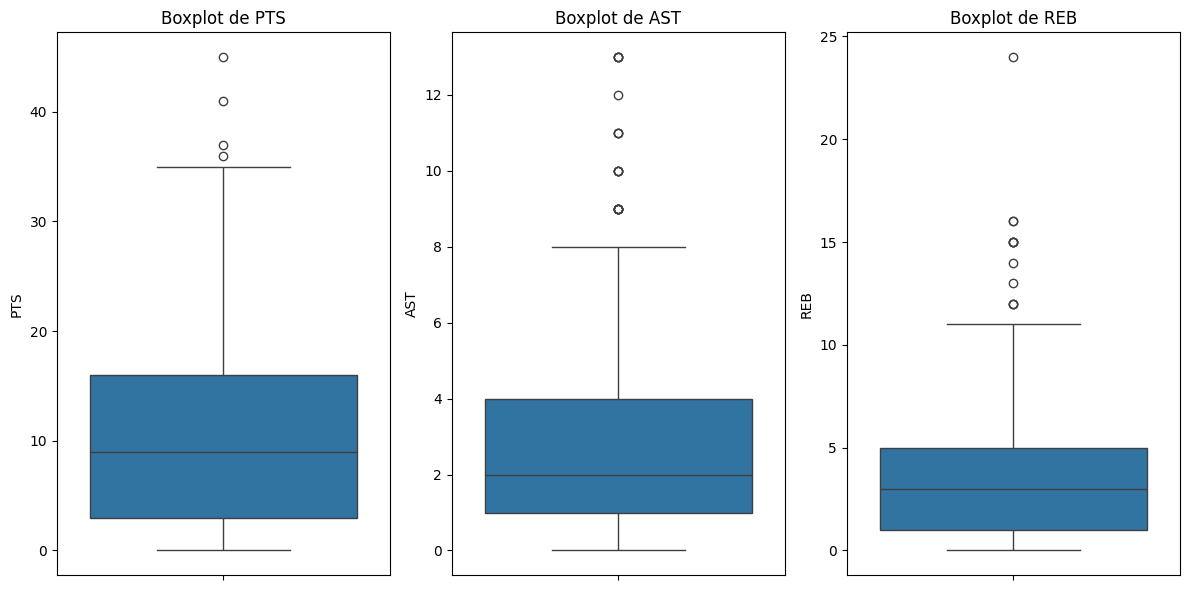

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que 'df' seja o seu DataFrame com os dados
# 1. Converter a coluna GAME_DATE para datetime
df['GAME_DATE'] = pd.to_datetime(df['GAME_DATE'], format='%Y-%m-%d', errors='coerce')

# 2. Verificar valores únicos na coluna WL (Win/Loss)
print("Valores únicos na coluna WL:", df['WL'].unique())

# 3. Verificar possíveis valores inconsistentes em MIN (minutos jogados)
print("Valores máximos e mínimos de minutos jogados:")
print(df['MIN'].describe())

# 4. Identificar outliers em estatísticas relevantes (Pontos, Assistências e Rebotes)
cols_to_check = ['PTS', 'AST', 'REB']

plt.figure(figsize=(12, 6))
for i, col in enumerate(cols_to_check, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot de {col}')

plt.tight_layout()
plt.show()

In [4]:
# confirmando a transformação da coluna de data

print(df['GAME_DATE'].dtype)


datetime64[ns]


In [5]:
print(df[['GAME_DATE']].head(10))


   GAME_DATE
0 2024-04-12
1 2024-04-10
2 2024-04-09
3 2024-04-07
4 2024-04-05
5 2024-04-01
6 2024-03-31
7 2024-03-29
8 2024-03-27
9 2024-03-25


In [6]:
# verificando se há valores NaT
print(df['GAME_DATE'].isna().sum())


0


C:\Users\mathe\AppData\Local\Temp\ipykernel_12648\118394933.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['PLAYER'] = df_filtered['Player_ID'].map(player_names)


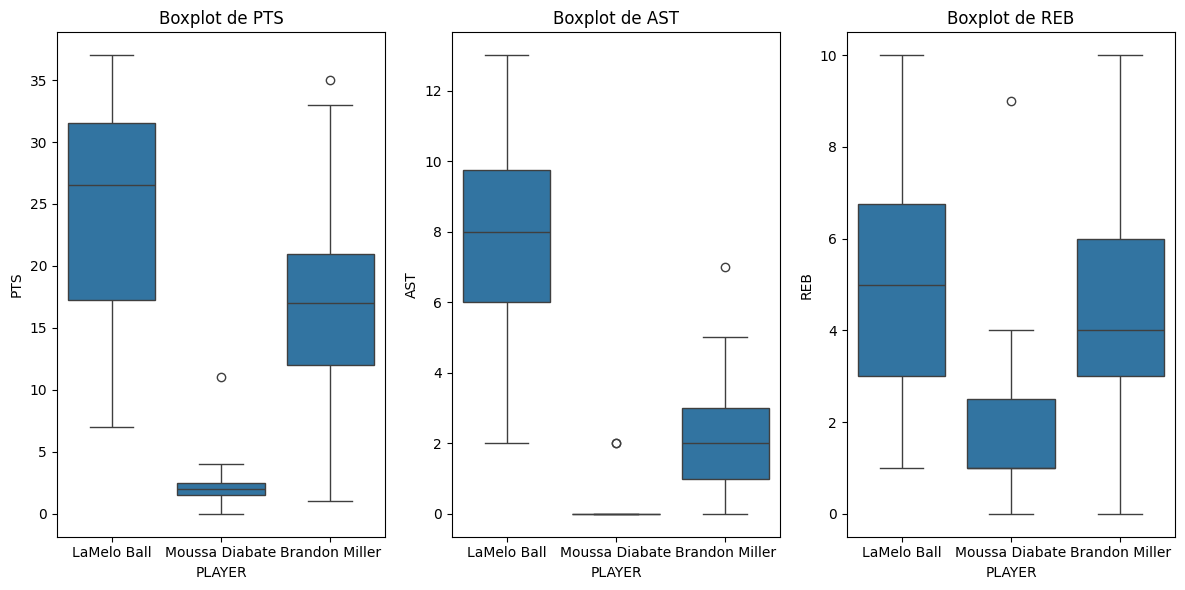

In [12]:
# analisando os graficos dos 3 jogadores especificos

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# IDs dos jogadores
player_ids = [1630163, 1631217, 1641706]  # LaMelo Ball, Moussa Diabate, Brandon Miller

# Filtrando o DataFrame para incluir apenas esses jogadores
df_filtered = df[df['Player_ID'].isin(player_ids)]

# Para adicionar os nomes dos jogadores, você pode criar uma lista ou mapear de alguma maneira.
# Podemos usar a função `.map()` para adicionar o nome do jogador com base no Player_ID
player_names = {
    1630163: 'LaMelo Ball',
    1631217: 'Moussa Diabate',
    1641706: 'Brandon Miller'
}

df_filtered['PLAYER'] = df_filtered['Player_ID'].map(player_names)

# Estatísticas a serem verificadas
cols_to_check = ['PTS', 'AST', 'REB']

# Criando os boxplots para as estatísticas
plt.figure(figsize=(12, 6))
for i, col in enumerate(cols_to_check, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df_filtered['PLAYER'], y=df_filtered[col])
    plt.title(f'Boxplot de {col}')

plt.tight_layout()
plt.show()


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados salvos anteriormente
df = pd.read_csv("jogos_charlotte_hornets.csv")

# IDs e nomes dos jogadores monitorados
player_ids = {1630163: "LaMelo Ball", 1631217: "Moussa Diabate", 1641706: "Brandon Miller"}

# Filtrando apenas os jogadores desejados
df = df[df["Player_ID"].isin(player_ids.keys())]

# Adicionando a coluna de nome do jogador
df["PLAYER"] = df["Player_ID"].map(player_ids)

df


,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE,PLAYER
69,22023,1630163,22300635,"JAN 26, 2024",CHA vs. HOU,L,23,6,16,0.375,...,2,8,2,0,3,4,15,-25,1,LaMelo Ball
70,22023,1630163,22300619,"JAN 24, 2024",CHA @ DET,L,32,6,21,0.286,...,4,7,1,0,4,6,17,-24,1,LaMelo Ball
71,22023,1630163,22300610,"JAN 22, 2024",CHA @ MIN,W,35,7,18,0.389,...,6,13,3,0,1,1,18,10,1,LaMelo Ball
72,22023,1630163,22300584,"JAN 19, 2024",CHA vs. SAS,W,32,10,13,0.769,...,1,8,3,0,4,4,28,13,1,LaMelo Ball
73,22023,1630163,22300575,"JAN 17, 2024",CHA @ NOP,L,31,8,19,0.421,...,5,7,2,0,4,5,29,-12,1,LaMelo Ball
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,22023,1641706,22300133,"NOV 04, 2023",CHA @ IND,W,34,4,7,0.571,...,3,1,0,1,0,4,10,17,1,Brandon Miller
582,22023,1641706,22300122,"NOV 01, 2023",CHA @ HOU,L,24,4,9,0.444,...,5,2,0,0,1,5,10,-6,1,Brandon Miller
583,22023,1641706,22300101,"OCT 30, 2023",CHA vs. BKN,L,36,7,16,0.438,...,9,2,0,1,0,3,22,-4,1,Brandon Miller
584,22023,1641706,22300077,"OCT 27, 2023",CHA vs. DET,L,33,6,13,0.462,...,6,2,1,1,3,4,17,-2,1,Brandon Miller


In [12]:
# Estatísticas por jogador
df_stats = df.groupby("PLAYER")[["PTS", "REB", "AST"]].agg(["mean", "median", lambda x: x.mode().values[0], "std"])
df_stats.columns = ["PTS_Média", "PTS_Mediana", "PTS_Moda", "PTS_Desvio_Padrão", 
                    "REB_Média", "REB_Mediana", "REB_Moda", "REB_Desvio_Padrão", 
                    "AST_Média", "AST_Mediana", "AST_Moda", "AST_Desvio_Padrão"]
df_stats.reset_index(inplace=True)
df_stats


,PLAYER,PTS_Média,PTS_Mediana,PTS_Moda,PTS_Desvio_Padrão,REB_Média,REB_Mediana,REB_Moda,REB_Desvio_Padrão,AST_Média,AST_Mediana,AST_Moda,AST_Desvio_Padrão
0,Brandon Miller,17.283784,17.0,21,7.263194,4.256757,4.0,3,2.196266,2.364865,2.0,2,1.360644
1,LaMelo Ball,23.909091,26.5,28,9.252588,5.136364,5.0,6,2.883375,8.000000,8.0,5,2.943920
2,Moussa Diabate,2.636364,2.0,2,3.009077,2.181818,1.0,1,2.561959,0.363636,0.0,0,0.809040


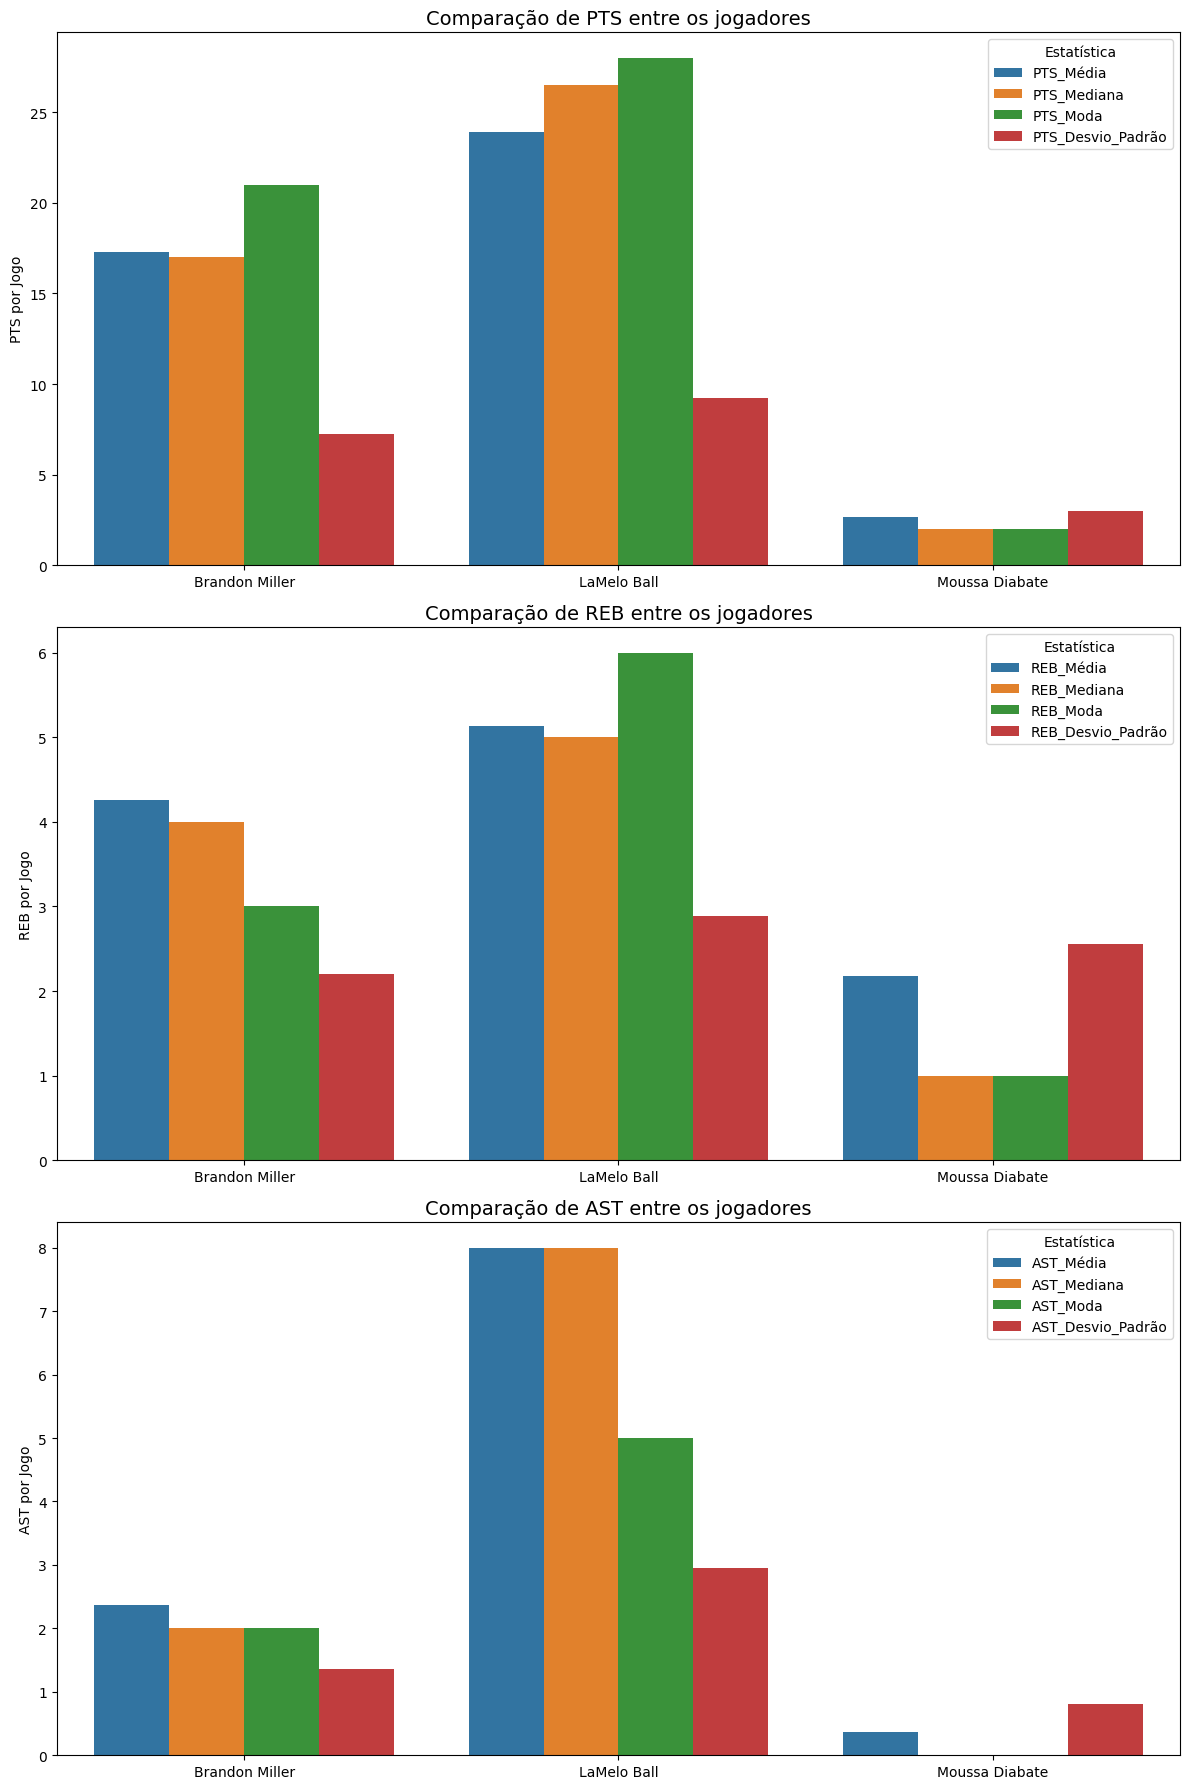

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustando o tamanho da figura
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Lista de estatísticas e títulos
metrics = ["Média", "Mediana", "Moda", "Desvio_Padrão"]
cols = ["PTS", "REB", "AST"]

# Criar os gráficos de barras para cada estatística
for i, col in enumerate(cols):
    df_plot = df_stats[["PLAYER", f"{col}_Média", f"{col}_Mediana", f"{col}_Moda", f"{col}_Desvio_Padrão"]]
    df_plot = df_plot.melt(id_vars="PLAYER", var_name="Estatística", value_name=col)

    ax = axes[i]
    sns.barplot(x="PLAYER", y=col, hue="Estatística", data=df_plot, ax=ax)
    ax.set_title(f"Comparação de {col} entre os jogadores", fontsize=14)
    ax.set_xlabel("")
    ax.set_ylabel(f"{col} por Jogo")
    ax.legend(title="Estatística", loc="upper right")

plt.tight_layout()
plt.show()


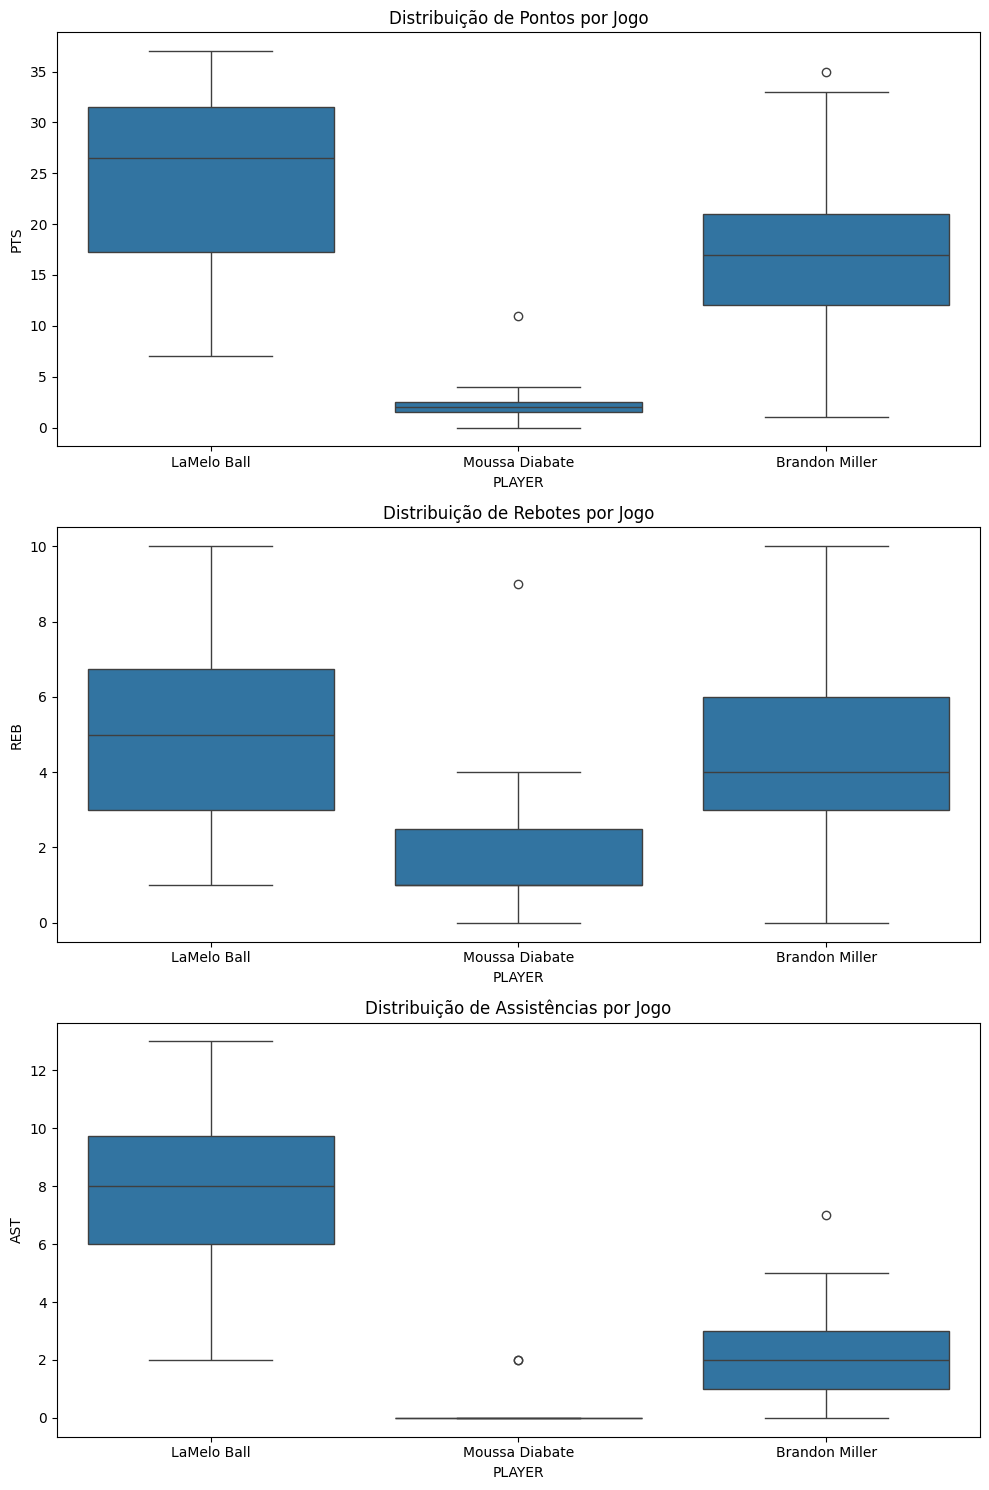

In [14]:
# Criar gráficos comparando desempenho dos jogadores
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Pontos
sns.boxplot(x="PLAYER", y="PTS", data=df, ax=axes[0])
axes[0].set_title("Distribuição de Pontos por Jogo")

# Rebotes
sns.boxplot(x="PLAYER", y="REB", data=df, ax=axes[1])
axes[1].set_title("Distribuição de Rebotes por Jogo")

# Assistências
sns.boxplot(x="PLAYER", y="AST", data=df, ax=axes[2])
axes[2].set_title("Distribuição de Assistências por Jogo")

plt.tight_layout()
plt.show()


In [19]:
print(df.columns)

Index(['SEASON_ID', 'Player_ID', 'Game_ID', 'GAME_DATE', 'MATCHUP', 'WL',
       'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'PLUS_MINUS', 'VIDEO_AVAILABLE', 'PLAYER'],
      dtype='object')


In [22]:
# Criando a coluna 'Casa_Fora' baseada na coluna 'MATCHUP'
df["Casa_Fora"] = df["MATCHUP"].apply(lambda x: "Fora" if "@" in x else "Casa")

# Contagem total de jogos dentro e fora de casa
df_casa_fora = df.groupby(["PLAYER", "Casa_Fora"]).size().reset_index(name="Quantidade de jogos")
df_casa_fora


,PLAYER,Casa_Fora,Quantidade de jogos
0,Brandon Miller,Casa,40
1,Brandon Miller,Fora,34
2,LaMelo Ball,Casa,11
3,LaMelo Ball,Fora,11
4,Moussa Diabate,Casa,7
5,Moussa Diabate,Fora,4


In [32]:
# Agrupando os dados por jogador e local do jogo (casa/fora)
df_stats_casa_fora = df.groupby(["PLAYER", "Casa_Fora"])[["PTS", "REB", "AST"]].agg(["sum", "mean"])

# Renomeando as colunas para melhor visualização
df_stats_casa_fora.columns = ["PTS_Total", "PTS_Média", "REB_Total", "REB_Média", "AST_Total", "AST_Média"]

# Resetando o índice para transformar os índices em colunas
df_stats_casa_fora.reset_index(inplace=True)

df_stats_casa_fora


,PLAYER,Casa_Fora,PTS_Total,PTS_Média,REB_Total,REB_Média,AST_Total,AST_Média
0,Brandon Miller,Casa,736,18.400000,183,4.575000,99,2.475000
1,Brandon Miller,Fora,543,15.970588,132,3.882353,76,2.235294
2,LaMelo Ball,Casa,289,26.272727,58,5.272727,96,8.727273
3,LaMelo Ball,Fora,237,21.545455,55,5.000000,80,7.272727
4,Moussa Diabate,Casa,9,1.285714,13,1.857143,4,0.571429
5,Moussa Diabate,Fora,20,5.000000,11,2.750000,0,0.000000


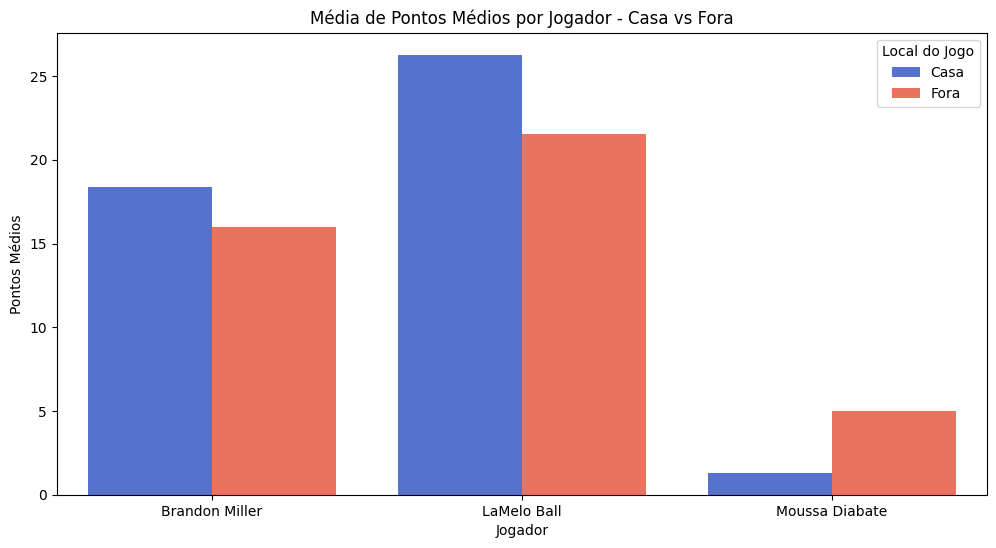

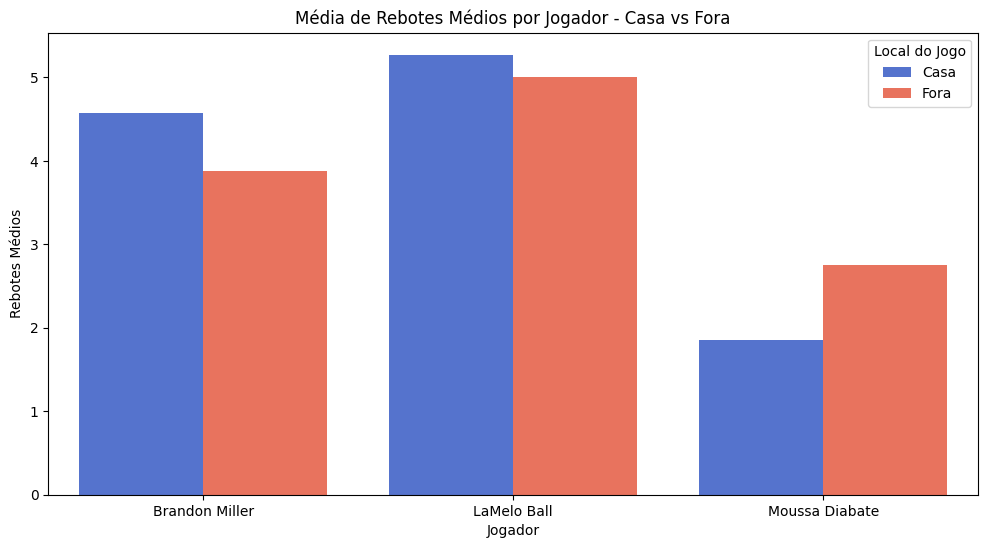

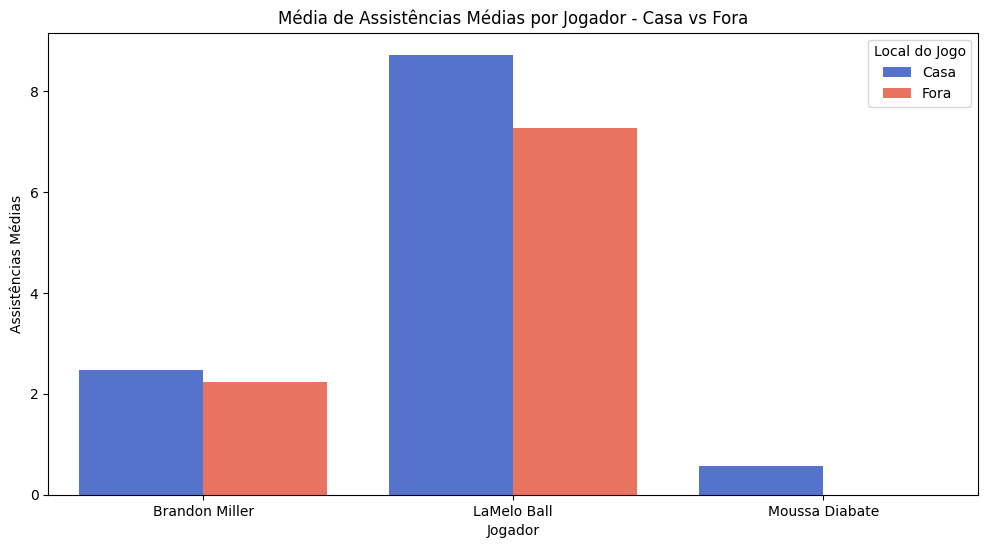

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir cores para Casa e Fora
cores = {"Casa": "royalblue", "Fora": "tomato"}

# Criar gráficos para Pontos, Rebotes e Assistências
metrics = [("PTS_Média", "Pontos Médios"), ("REB_Média", "Rebotes Médios"), ("AST_Média", "Assistências Médias")]

for metric, title in metrics:
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=df_stats_casa_fora, x="PLAYER", y=metric, hue="Casa_Fora", palette=cores)
    plt.title(f"Média de {title} por Jogador - Casa vs Fora")
    plt.xlabel("Jogador")
    plt.ylabel(title)
    plt.legend(title="Local do Jogo")
    plt.show()


In [38]:
import pandas as pd
from nba_api.stats.endpoints import playercareerstats

# Dicionário associando IDs aos nomes
player_info = {
    1630163: "LaMelo Ball",
    1631217: "Moussa Diabate",
    1641706: "Brandon Miller"
}

# Definição dos IDs dos jogadores
player_ids = list(player_info.keys())

# Buscar estatísticas de carreira para os jogadores selecionados
career_stats_list = []

for player_id in player_ids:
    career_stats = playercareerstats.PlayerCareerStats(player_id=player_id).get_data_frames()[0]

    # Filtrando apenas os dados totais da NBA (excluindo Playoffs e outros campeonatos)
    career_totals = career_stats[career_stats["LEAGUE_ID"] == "00"].iloc[-1]

    # Adicionando ao DataFrame
    career_stats_list.append({
        "PLAYER": player_info[player_id],  # Obtendo nome do dicionário
        "PTS_Carreira": career_totals["PTS"],
        "REB_Carreira": career_totals["REB"],
        "AST_Carreira": career_totals["AST"]
    })

# Criando o DataFrame final
df_career_stats = pd.DataFrame(career_stats_list)

# Exibir os dados processados
print(df_career_stats)


           PLAYER  PTS_Carreira  REB_Carreira  AST_Carreira
0     LaMelo Ball           873           163           226
1  Moussa Diabate           178           271            29
2  Brandon Miller           568           131            98


In [39]:
import pandas as pd
from nba_api.stats.endpoints import playercareerstats, playergamelog

# Dicionário associando IDs aos nomes
player_info = {
    1630163: "LaMelo Ball",
    1631217: "Moussa Diabate",
    1641706: "Brandon Miller"
}

# Lista para armazenar as estatísticas
career_stats_list = []

for player_id in player_info.keys():
    # Obtendo estatísticas totais da carreira
    career_stats = playercareerstats.PlayerCareerStats(player_id=player_id).get_data_frames()[0]
    career_totals = career_stats[career_stats["LEAGUE_ID"] == "00"].iloc[-1]

    # Obtendo o log de jogos para separar casa e fora
    game_log = playergamelog.PlayerGameLog(player_id=player_id, season="2023-24").get_data_frames()[0]

    # Criando colunas "Casa" e "Fora"
    game_log["HOME"] = game_log["MATCHUP"].apply(lambda x: "Casa" if "vs." in x else "Fora")

    # Calculando estatísticas separadas para casa e fora
    casa_stats = game_log[game_log["HOME"] == "Casa"]
    fora_stats = game_log[game_log["HOME"] == "Fora"]

    gp_casa = len(casa_stats)
    gp_fora = len(fora_stats)
    
    pts_casa_media = casa_stats["PTS"].mean() if gp_casa > 0 else 0
    pts_fora_media = fora_stats["PTS"].mean() if gp_fora > 0 else 0

    # Adicionando os dados ao DataFrame
    career_stats_list.append({
        "PLAYER": player_info[player_id],
        "GP": career_totals["GP"],
        "MIN": career_totals["MIN"],
        "PTS_Carreira": career_totals["PTS"],
        "REB_Carreira": career_totals["REB"],
        "AST_Carreira": career_totals["AST"],
        "PTS_Média": career_totals["PTS"] / career_totals["GP"],
        "REB_Média": career_totals["REB"] / career_totals["GP"],
        "AST_Média": career_totals["AST"] / career_totals["GP"],
        "GP_Casa": gp_casa,
        "GP_Fora": gp_fora,
        "PTS_Casa_Média": pts_casa_media,
        "PTS_Fora_Média": pts_fora_media
    })

# Criando o DataFrame final
df_career_stats = pd.DataFrame(career_stats_list)

# Exibir os dados processados
print(df_career_stats)


           PLAYER  GP     MIN  PTS_Carreira  REB_Carreira  AST_Carreira  \
0     LaMelo Ball  31  1031.0           873           163           226   
1  Moussa Diabate  40   742.0           178           271            29   
2  Brandon Miller  27   924.0           568           131            98   

   PTS_Média  REB_Média  AST_Média  GP_Casa  GP_Fora  PTS_Casa_Média  \
0  28.161290   5.258065   7.290323       11       11       26.272727   
1   4.450000   6.775000   0.725000        7        4        1.285714   
2  21.037037   4.851852   3.629630       40       34       18.400000   

   PTS_Fora_Média  
0       21.545455  
1        5.000000  
2       15.970588  


In [40]:
import pandas as pd
from nba_api.stats.endpoints import playercareerstats, playergamelog

# Dicionário associando IDs aos nomes
player_info = {
    1630163: "LaMelo Ball",
    1631217: "Moussa Diabate",
    1641706: "Brandon Miller"
}

# Lista para armazenar as estatísticas
career_stats_list = []

for player_id in player_info.keys():
    # Obtendo estatísticas totais da carreira
    career_stats = playercareerstats.PlayerCareerStats(player_id=player_id).get_data_frames()[0]

    # Procurar a linha da carreira total (onde SEASON_ID == "Career")
    career_totals = career_stats[career_stats["SEASON_ID"] == "Career"]

    if career_totals.empty:
        # Se não encontrar, pegar a soma de todas as temporadas
        career_totals = career_stats[career_stats["LEAGUE_ID"] == "00"].sum(numeric_only=True)

    else:
        # Se encontrar, pegar diretamente essa linha
        career_totals = career_totals.iloc[0]

    # Obtendo o log de jogos para separar casa e fora (somente da temporada atual)
    game_log = playergamelog.PlayerGameLog(player_id=player_id, season="2023-24").get_data_frames()[0]

    # Criando colunas "Casa" e "Fora"
    game_log["HOME"] = game_log["MATCHUP"].apply(lambda x: "Casa" if "vs." in x else "Fora")

    # Calculando estatísticas separadas para casa e fora
    casa_stats = game_log[game_log["HOME"] == "Casa"]
    fora_stats = game_log[game_log["HOME"] == "Fora"]

    gp_casa = len(casa_stats)
    gp_fora = len(fora_stats)

    pts_casa_media = casa_stats["PTS"].mean() if gp_casa > 0 else 0
    pts_fora_media = fora_stats["PTS"].mean() if gp_fora > 0 else 0

    # Adicionando os dados ao DataFrame
    career_stats_list.append({
        "PLAYER": player_info[player_id],
        "GP": int(career_totals["GP"]),
        "MIN": int(career_totals["MIN"]),
        "PTS_Carreira": int(career_totals["PTS"]),
        "REB_Carreira": int(career_totals["REB"]),
        "AST_Carreira": int(career_totals["AST"]),
        "PTS_Média": career_totals["PTS"] / career_totals["GP"],
        "REB_Média": career_totals["REB"] / career_totals["GP"],
        "AST_Média": career_totals["AST"] / career_totals["GP"],
        "GP_Casa": gp_casa,
        "GP_Fora": gp_fora,
        "PTS_Casa_Média": pts_casa_media,
        "PTS_Fora_Média": pts_fora_media
    })

# Criando o DataFrame final
df_career_stats = pd.DataFrame(career_stats_list)

# Exibir os dados processados
print(df_career_stats)


           PLAYER   GP   MIN  PTS_Carreira  REB_Carreira  AST_Carreira  \
0     LaMelo Ball  215  6901          4548          1310          1590   
1  Moussa Diabate   73  1001           266           345            37   
2  Brandon Miller  101  3307          1847           446           273   

   PTS_Média  REB_Média  AST_Média  GP_Casa  GP_Fora  PTS_Casa_Média  \
0  21.153488   6.093023   7.395349       11       11       26.272727   
1   3.643836   4.726027   0.506849        7        4        1.285714   
2  18.287129   4.415842   2.702970       40       34       18.400000   

   PTS_Fora_Média  
0       21.545455  
1        5.000000  
2       15.970588  


<Figure size 1000x500 with 0 Axes>

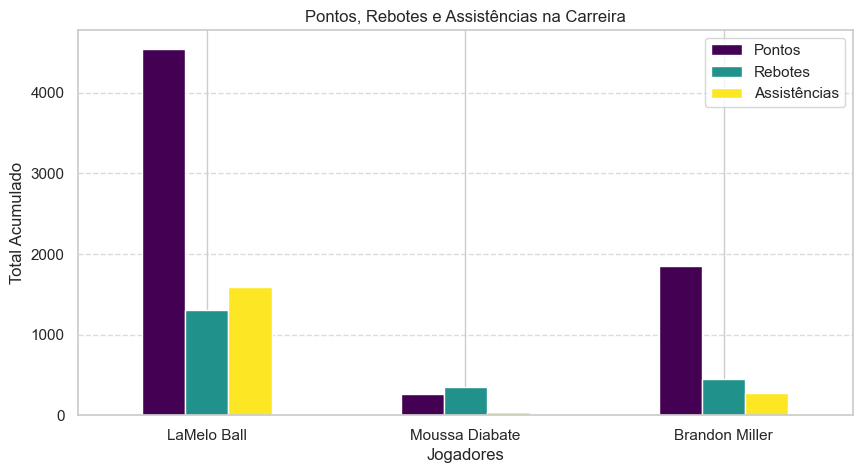

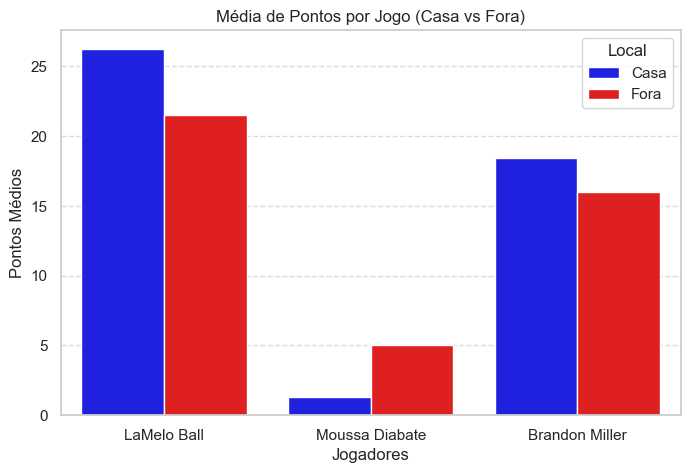

<Figure size 800x500 with 0 Axes>

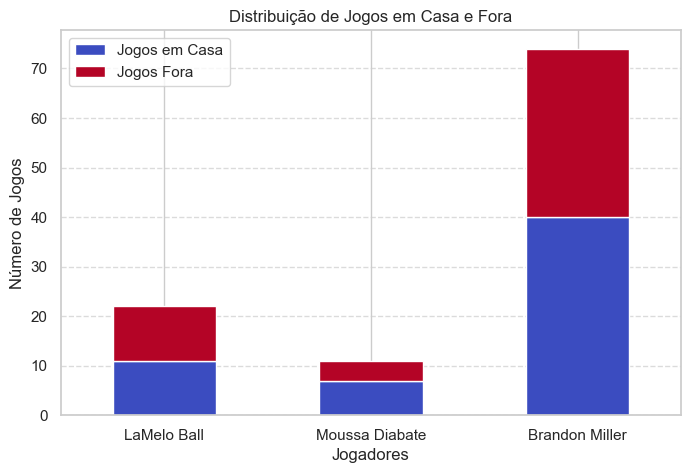

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração do estilo dos gráficos
sns.set(style="whitegrid")

# Gráfico 1: Pontos, Rebotes e Assistências na Carreira
plt.figure(figsize=(10, 5))
df_career_stats.set_index("PLAYER")[["PTS_Carreira", "REB_Carreira", "AST_Carreira"]].plot(kind="bar", figsize=(10, 5), colormap="viridis")
plt.title("Pontos, Rebotes e Assistências na Carreira")
plt.ylabel("Total Acumulado")
plt.xlabel("Jogadores")
plt.xticks(rotation=0)
plt.legend(["Pontos", "Rebotes", "Assistências"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Gráfico 2: Média de Pontos por Jogo (Casa vs Fora)
plt.figure(figsize=(8, 5))
df_melted = df_career_stats.melt(id_vars="PLAYER", value_vars=["PTS_Casa_Média", "PTS_Fora_Média"], var_name="Local", value_name="Média de Pontos")
df_melted["Local"] = df_melted["Local"].map({"PTS_Casa_Média": "Casa", "PTS_Fora_Média": "Fora"})

sns.barplot(x="PLAYER", y="Média de Pontos", hue="Local", data=df_melted, palette=["blue", "red"])
plt.title("Média de Pontos por Jogo (Casa vs Fora)")
plt.xlabel("Jogadores")
plt.ylabel("Pontos Médios")
plt.xticks(rotation=0)
plt.legend(title="Local")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
